## Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


## Load Dataset

In [6]:
df = pd.read_csv(r"C:\Users\pushp\Downloads\Cuisine_rating.csv")

## Exploratory Data Analysis

### Step 1: Data Sample

In [7]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


### step 2: Data Shape

In [8]:
df.shape

(200, 15)

##### - Rows are: 200 , Cols are: 15

### Step 3: Describe Data Statistics (mean, median, standard deviation, max, min, count and quartiles)

In [9]:
df.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


### Step 4: Check Data Types

In [10]:
# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


### Step 5: Check for null values

In [11]:
df.isna().sum()

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64

##### - There is no any null value in dataset

### Step 6: Check for unique values

In [12]:
# unique values in each column
df.nunique()

User ID           200
Area code          65
Location           10
Gender              2
YOB                46
Marital Status      3
Activity            2
Budget              5
Cuisines            7
Alcohol             3
Smoker              3
Food Rating         5
Service Rating      5
Overall Rating      9
Often A S           2
dtype: int64

In [13]:
df['Marital Status'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [14]:
df['Cuisines'].unique()

array(['Japanese', 'Indian', 'Seafood', 'Filipino', 'Italian', 'Chinese',
       'French'], dtype=object)

In [15]:
df['Location'].unique()

array(['Upper East Side,NY', 'St. George,NY', 'Upper West Side,NY',
       'Central Park,NY', 'China Town, NY', 'Riverdale,NY',
       'Market City, NY', 'Central Park,ny', 'Market City, MY',
       'Cedar Hill, NY'], dtype=object)

### Step 7: Data Cleaning

#### - replace ny to NY, MY to NY

In [16]:
df["Location"] = df["Location"].str.replace('ny', 'NY')
df["Location"] = df["Location"].str.replace('MY', 'NY')
df["Location"] = df["Location"].str.replace(',NY', ', NY')
df['Location'].unique()

array(['Upper East Side, NY', 'St. George, NY', 'Upper West Side, NY',
       'Central Park, NY', 'China Town, NY', 'Riverdale, NY',
       'Market City, NY', 'Cedar Hill, NY'], dtype=object)

### Step 8: Pivot Tables

In [17]:
a = df.groupby(['Marital Status', 'Gender'])['Food Rating'].count()
a.head()

Marital Status  Gender
Divorced        Female     6
                Male       8
Married         Female    36
                Male      50
Single          Female    40
Name: Food Rating, dtype: int64

#### - Married Males rated the restaurant food 50 times.

In [18]:
b = df.groupby(['Smoker', 'Gender'])['Food Rating'].count()
b

Smoker    Gender
Never     Female    20
          Male      39
Often     Female    28
          Male      42
Socially  Female    34
          Male      37
Name: Food Rating, dtype: int64

#### - Males who smoke often rated the restaurant food 42 times

In [19]:
c = df.groupby(['Marital Status', 'Smoker', 'Gender'])['Food Rating'].count()
c

Marital Status  Smoker    Gender
Divorced        Often     Female     6
                          Male       8
Married         Never     Female    11
                          Male      16
                Often     Female     8
                          Male      14
                Socially  Female    17
                          Male      20
Single          Never     Female     9
                          Male      23
                Often     Female    14
                          Male      20
                Socially  Female    17
                          Male      17
Name: Food Rating, dtype: int64

#### - Single Males who never Smoke rate the restaurant food 23 times.

In [20]:
d = df.groupby(['Marital Status', 'Activity', 'Gender'])['Budget'].count()
d

Marital Status  Activity      Gender
Divorced        Professional  Female     2
                              Male       6
                Student       Female     4
                              Male       2
Married         Professional  Female    18
                              Male      18
                Student       Female    18
                              Male      32
Single          Professional  Female    20
                              Male      16
                Student       Female    20
                              Male      44
Name: Budget, dtype: int64

#### - Single Male Students prefer restaurant the most counted as 44 entities,

#### - Married Male Students are the second most counted (32) who prefer restaurant

In [21]:
e = df.groupby(["Cuisines"])["Food Rating"].sum()
e

Cuisines
Chinese      83
Filipino     92
French      112
Indian       89
Italian      58
Japanese    139
Seafood      71
Name: Food Rating, dtype: int64

#### - Japanese Cuisines secure the highest food rating sum up to 139.

In [22]:
f = df.groupby(["Gender", "Alcohol "])["Food Rating"].sum()
f

Gender  Alcohol 
Female  Never       124
        Often        92
        Socially     57
Male    Never       148
        Often       116
        Socially    107
Name: Food Rating, dtype: int64

#### - Males who never taste Alcohol rated the restaurant food 148 times

### Step 9: Data Visualization

#### Step 9.1: Correlation

C:\Users\pushp\AppData\Local\Temp\ipykernel_29772\2529967813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.5, 1.0, 'Correlation Plot')

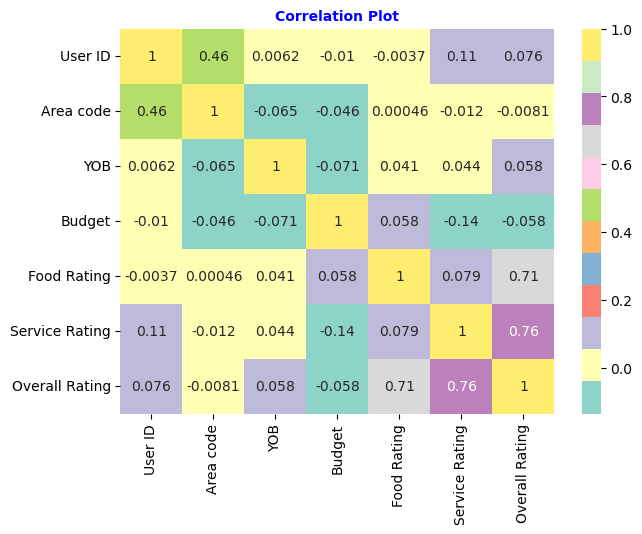

In [23]:
# correlation matrix
corr = df.corr()
corr

plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='Set3')
plt.title("Correlation Plot",fontsize = 10, fontweight = 'bold', color = 'blue')

#### - Food rating, service rating and overall rating are positively correlated with each other

#### Step 9.2: Correlation with respect to Gender Column

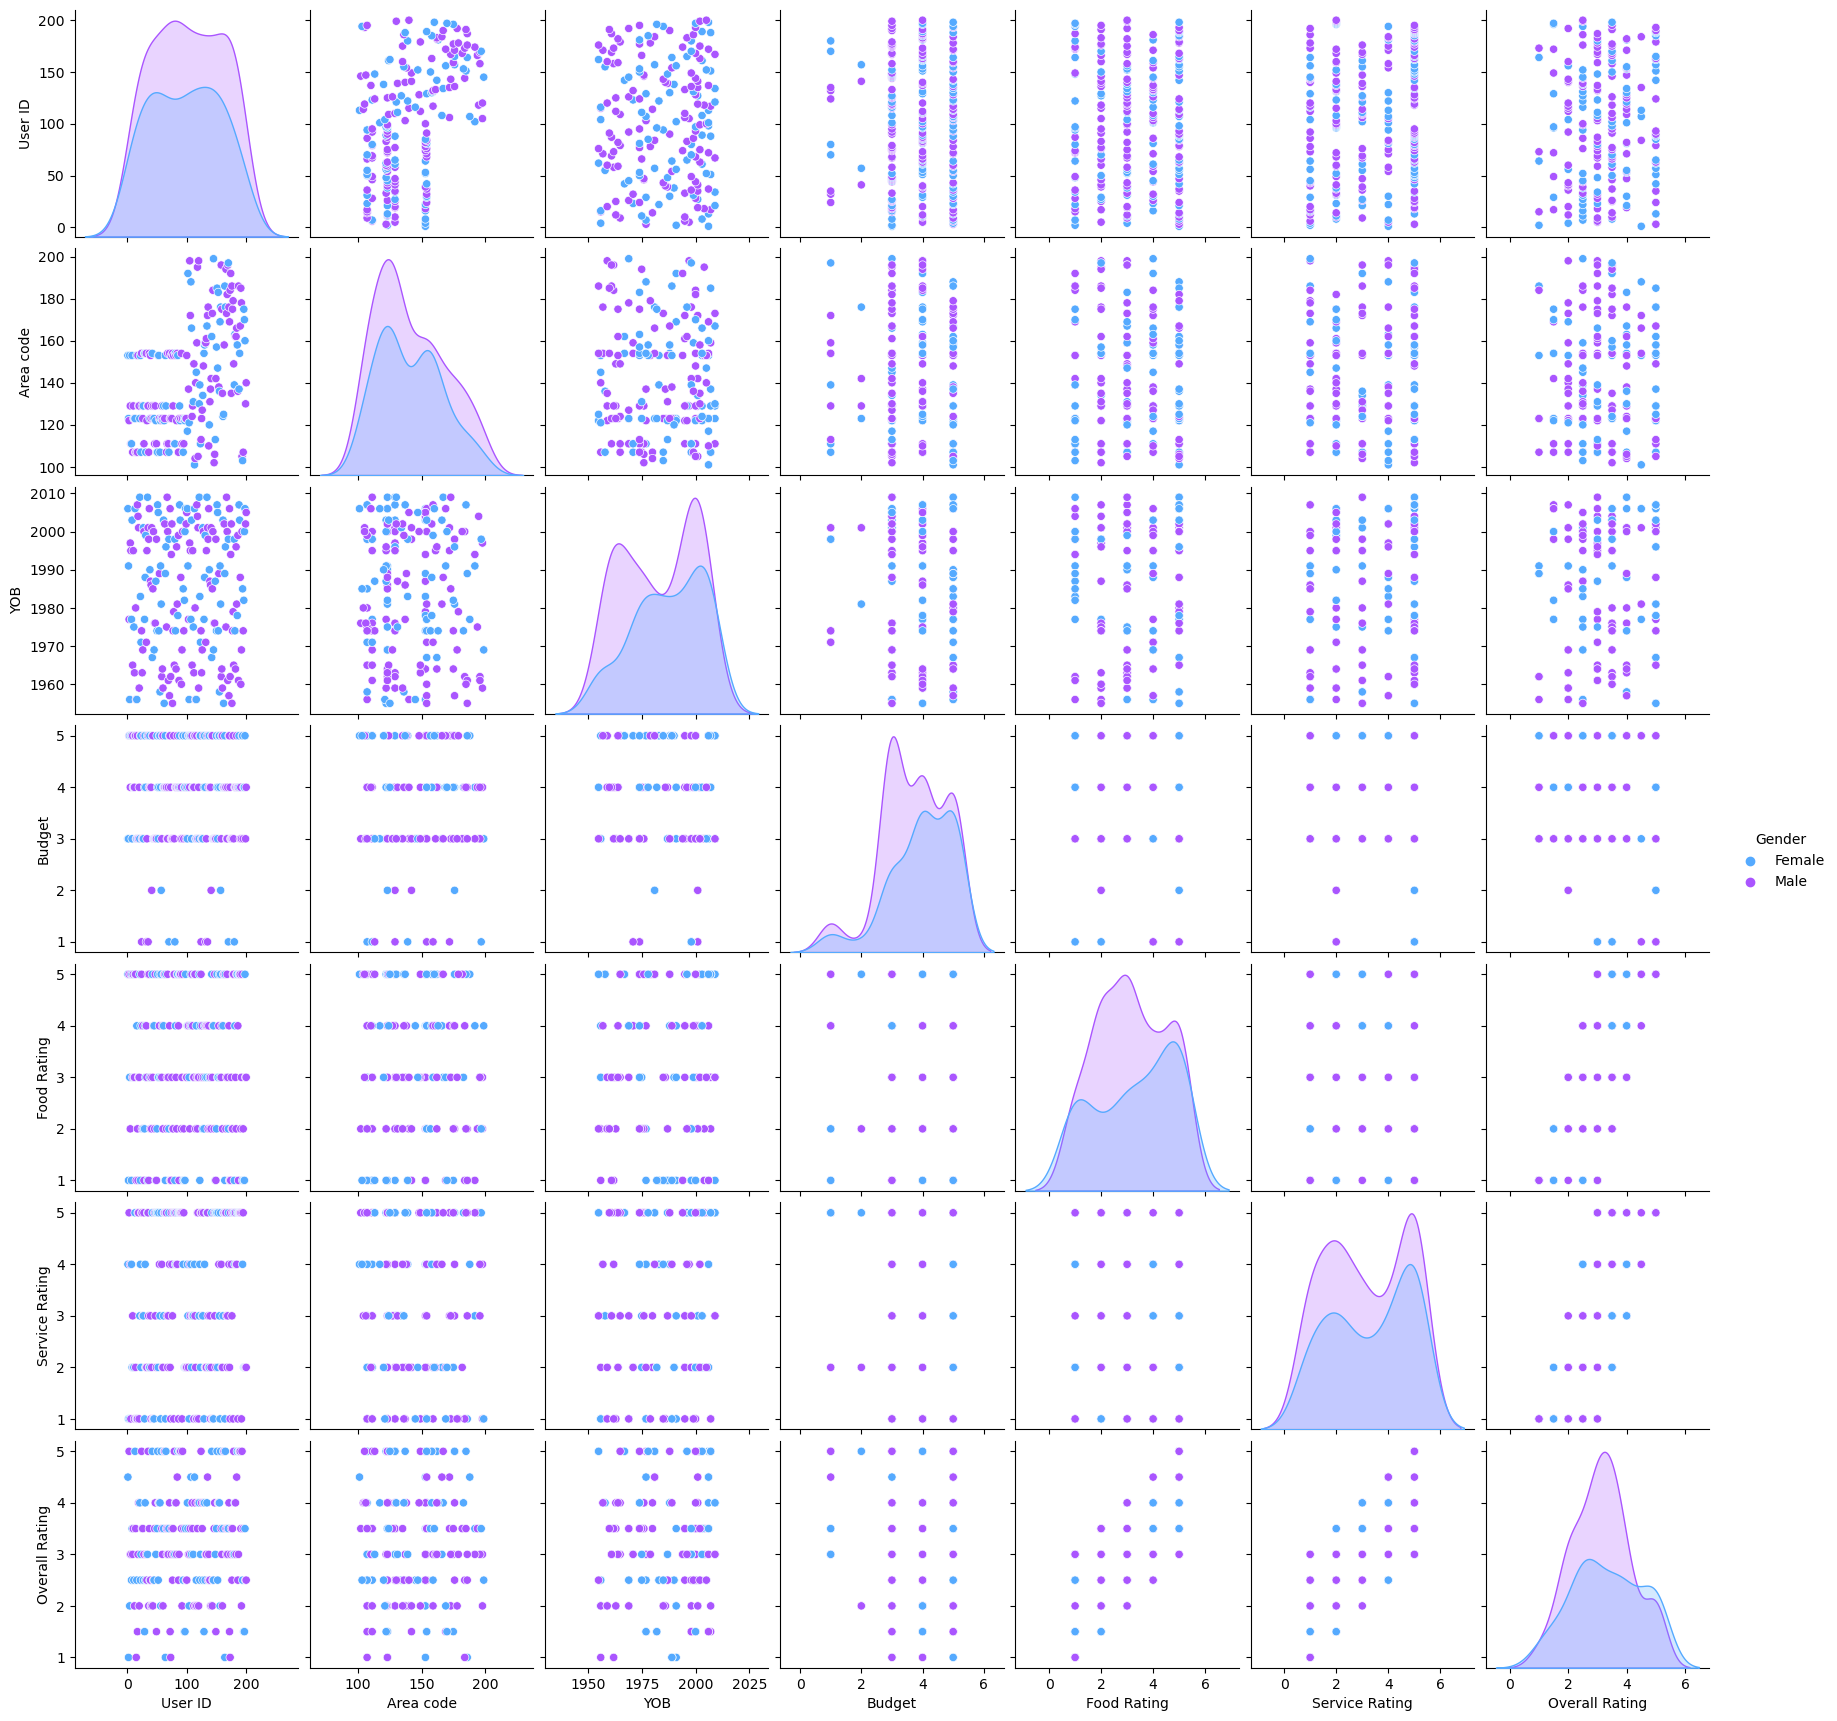

In [25]:
# pairplot
sns.pairplot(df, hue='Gender', palette='cool')

#### Step 9.3: Histogram

<Axes: xlabel='Overall Rating', ylabel='Count'>

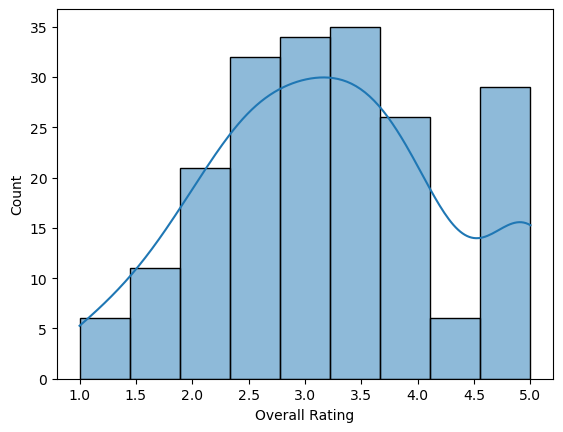

In [26]:
# hisogram
sns.histplot(df['Overall Rating'], kde=True)

#### Step 9.4: Barplots

C:\Users\pushp\AppData\Local\Temp\ipykernel_29772\630792089.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x='Cuisines', y='Food Rating', hue='Gender', palette='coolwarm',


<Axes: xlabel='Cuisines', ylabel='Food Rating'>

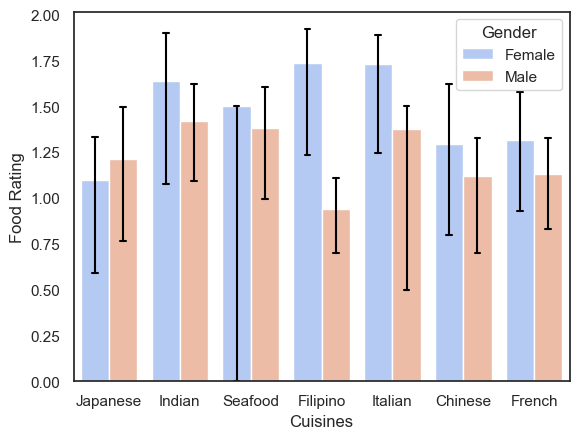

In [27]:
# barplot
sns.set_theme(style="white")
sns.barplot(data=df, x='Cuisines', y='Food Rating', hue='Gender', palette='coolwarm', 
            estimator=np.std, capsize=0.08, ci=95, errwidth=1.5, errcolor='black')

#### - Genderwise Food Rating for various cuisines offered by restaurant

C:\Users\pushp\AppData\Local\Temp\ipykernel_29772\1868559988.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x='Cuisines', y='Food Rating', hue='Smoker', palette='Set2',


<Axes: xlabel='Cuisines', ylabel='Food Rating'>

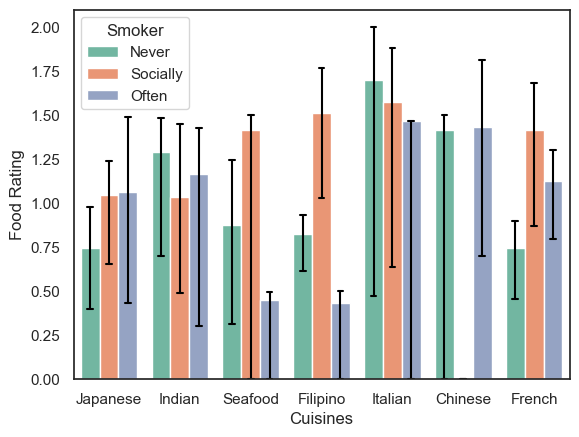

In [28]:
# barplot
sns.set_theme(style="white")
sns.barplot(data=df, x='Cuisines', y='Food Rating', hue='Smoker', palette='Set2', 
            estimator=np.std, capsize=0.08, ci=95, errwidth=1.5, errcolor='black')

#### - Smokerwise Food Rating for various cuisines offered by restaurant

C:\Users\pushp\AppData\Local\Temp\ipykernel_29772\1826684636.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x='Cuisines', y='Food Rating', hue='Activity', palette='muted',


<Axes: xlabel='Cuisines', ylabel='Food Rating'>

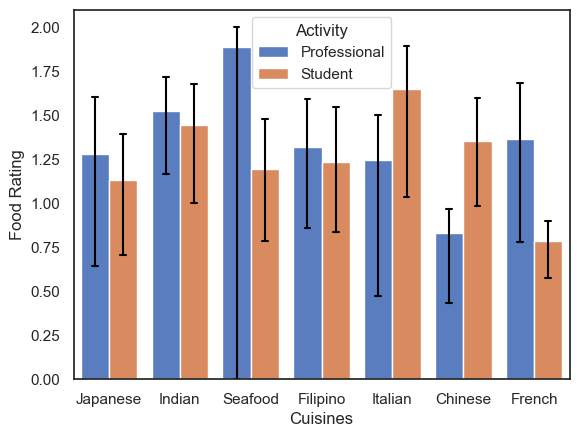

In [29]:
# barplot
sns.set_theme(style="white")
sns.barplot(data=df, x='Cuisines', y='Food Rating', hue='Activity', palette='muted', 
            estimator=np.std, capsize=0.08, ci=95, errwidth=1.5, errcolor='black')

#### - Activity-based Food Rating for various cuisines offered by restaurant

C:\Users\pushp\AppData\Local\Temp\ipykernel_29772\1720555850.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x='Cuisines', y='Food Rating', hue='Alcohol ', palette='cool',


<Axes: xlabel='Cuisines', ylabel='Food Rating'>

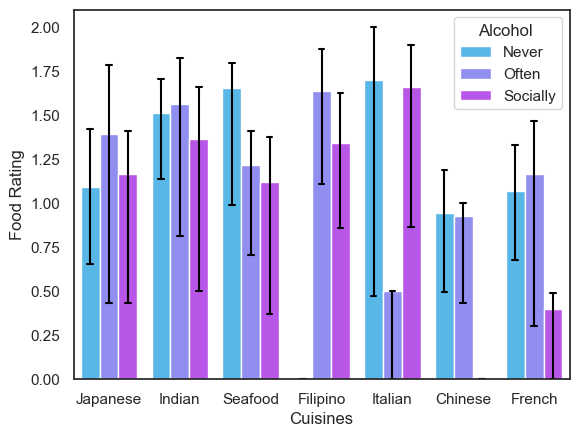

In [31]:
# barplot
sns.set_theme(style="white")
sns.barplot(data=df, x='Cuisines', y='Food Rating', hue='Alcohol ', palette='cool', 
            estimator=np.std, capsize=0.08, ci=95, errwidth=1.5, errcolor='black')

#### - Alcohol-based Food Rating for various cuisines offered by restaurant

#### Step 9.5: Boxplot

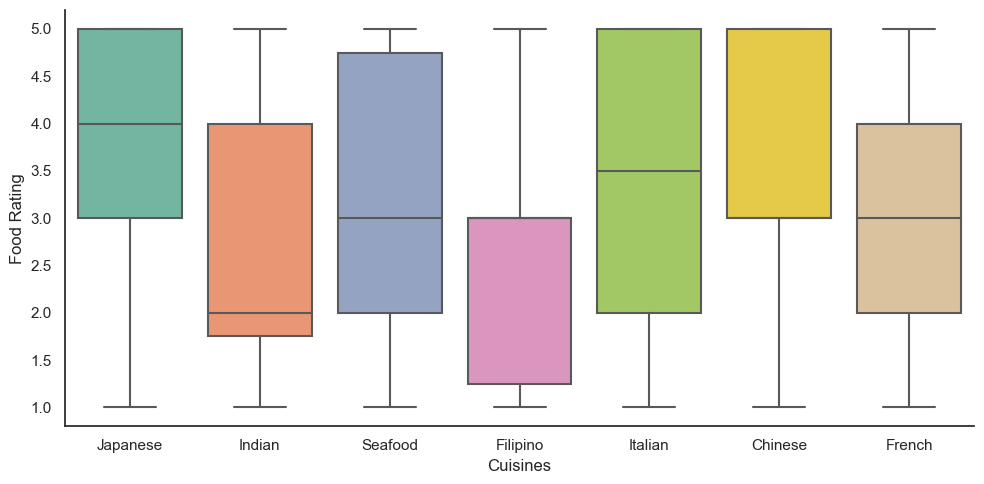

In [32]:
sns.catplot(x='Cuisines', y='Food Rating', data=df, kind='box', palette='Set2', height=5, aspect=2)

#### - Boxplot shows the min, max, 25%, 50%, 75% Food rating for each Cuisines

#### Step 9.6: Violin plot

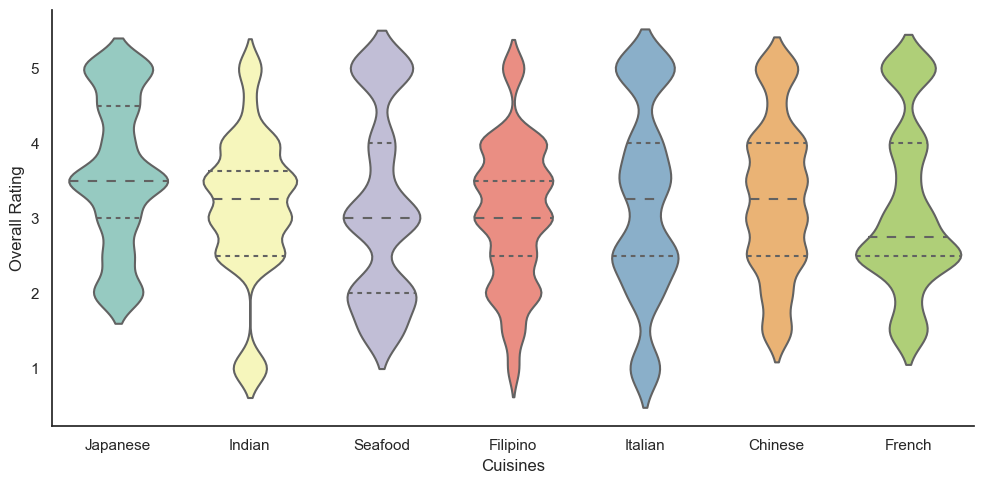

In [33]:
sns.catplot(x='Cuisines', y='Overall Rating', data=df, kind='violin', palette='Set3', height=5, aspect=2, split=True, inner='quartile', bw=0.2)

#### - Violin plot depicts the min, max, 25%, 50%, and 75% Overall Rating for each Cuisines, if violin is wider that shows most rating lies at that point,if violin is narrower that shows the less or 0 rating lies at that point